# Aprendizaje de Máquina - Proyecto 1: Entrega 2

Universidad Andrés Bello

Abril 2024

Santiago, Chile

*Código Principal - Limpieza y Análisis de datos*

Integrantes:

• Felipe Gutiérrez

• Santiago Salvador

In [1]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

C:\Users\ra1n\AppData\Local\Temp\ipykernel_10780\869355787.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Parte 1 - Limpieza de los datos y organización

In [2]:
ruta = "./consumos/"
rt1 = "T28052_CNANCUAN_NM66_"

# Definir dfset
lista_df = []
for month in range(3, 13): #201703 - 201712
    month_str = str(month).zfill(2)

    nombre_archivo = rt1 + "2017" + month_str + ".csv"
    archivo = ruta + nombre_archivo
    
    try:
        df_temp = pd.read_csv(archivo, header=None, sep=";")
        lista_df.append(df_temp)
    except FileNotFoundError:
        print(f"Archivo no encontrado: {nombre_archivo}")

for year in range(2018, 2022): #201801 - 202112
    for month in range(1, 13):
        month_str = str(month).zfill(2)

        nombre_archivo = rt1 + str(year) + month_str + ".csv"
        archivo = ruta + nombre_archivo
        
        try:
            df_temp = pd.read_csv(archivo, header=None, sep=";")
            lista_df.append(df_temp)
        except FileNotFoundError:
            print(f"Archivo no encontrado: {nombre_archivo}")

for month in range(1, 5): #202201 - 202204
    month_str = str(month).zfill(2)

    nombre_archivo = rt1 + "2022" + month_str + ".csv"
    archivo = ruta + nombre_archivo
    
    try:
        df_temp = pd.read_csv(archivo, header=None, sep=";")
        lista_df.append(df_temp)
    except FileNotFoundError:
        print(f"Archivo no encontrado: {nombre_archivo}")

# Concatenar los df y renombrar columnas
df_full = pd.concat(lista_df)

nuevos_nombres = {
    0: 'ID',
    1: 'fecha',
    2: 'consumo',
    3: 'calidad_senal',
    4: 'muestras_hora',
    5: 'nombre_interruptor'
}

df_full = df_full.rename(columns=nuevos_nombres)

# Crear nuevas columnas para año, mes, día y hora
df_full['fecha'] = pd.to_datetime(df_full['fecha'], utc=True)

# Crear nuevas columnas para descripcion de los interruptores
df_full[['subestacion', 'barra', 'interruptor', 'indicador']] = df_full['nombre_interruptor'].str.split(n=3, expand=True)
df_full = df_full.drop('nombre_interruptor', axis=1)

# Agrupar por 'subestacion' y 'barra', contar los interruptores únicos y sumar el consumo
df_full = df_full.groupby(['fecha', 'subestacion', 'barra', 'calidad_senal', 'muestras_hora']).agg(
    cantidad_interruptores=('interruptor', 'nunique'),
    consumo=('consumo', 'sum')
).reset_index()

df_full=df_full.set_index('fecha')

In [3]:
df_full.head(10)

,subestacion,barra,calidad_senal,muestras_hora,cantidad_interruptores,consumo
fecha,,,,,,
2017-03-01 03:00:00+00:00,AJAHUEL,110,1,4,4,121.980790
2017-03-01 03:00:00+00:00,BUIN,110,1,4,5,-1.150823
2017-03-01 03:00:00+00:00,CHENA,110,1,4,5,173.716561
2017-03-01 03:00:00+00:00,CNAVIA,110,1,4,9,292.470971
2017-03-01 03:00:00+00:00,ELSALTO,110,1,4,4,433.411947
2017-03-01 03:00:00+00:00,FLORIDA,110,1,4,8,31.084535
2017-03-01 03:00:00+00:00,LOSALME,110,1,4,4,161.158124
2017-03-01 04:00:00+00:00,AJAHUEL,110,1,4,4,101.512763
2017-03-01 04:00:00+00:00,BUIN,110,1,4,5,-1.101619


# Parte 2 - Analisis de datos

## 2.1 Revisar datos faltantes

In [4]:
datos_faltantes = df_full.isnull().sum()
print(f"\nnumero de datos faltantes:\n{datos_faltantes}")

df = df_full
df_numerico = df.drop(columns=['subestacion']) # crear una copia pero solo con valores numéricos


numero de datos faltantes:
subestacion               0
barra                     0
calidad_senal             0
muestras_hora             0
cantidad_interruptores    0
consumo                   0
dtype: int64


In [5]:
df_full.head(10)

,subestacion,barra,calidad_senal,muestras_hora,cantidad_interruptores,consumo
fecha,,,,,,
2017-03-01 03:00:00+00:00,AJAHUEL,110,1,4,4,121.980790
2017-03-01 03:00:00+00:00,BUIN,110,1,4,5,-1.150823
2017-03-01 03:00:00+00:00,CHENA,110,1,4,5,173.716561
2017-03-01 03:00:00+00:00,CNAVIA,110,1,4,9,292.470971
2017-03-01 03:00:00+00:00,ELSALTO,110,1,4,4,433.411947
2017-03-01 03:00:00+00:00,FLORIDA,110,1,4,8,31.084535
2017-03-01 03:00:00+00:00,LOSALME,110,1,4,4,161.158124
2017-03-01 04:00:00+00:00,AJAHUEL,110,1,4,4,101.512763
2017-03-01 04:00:00+00:00,BUIN,110,1,4,5,-1.101619


## 2.2 Determinar Valores atípicos

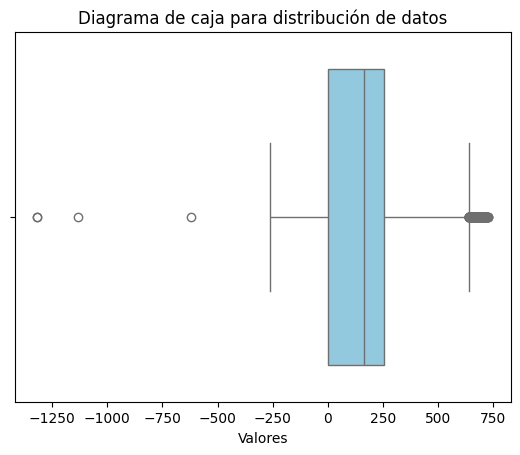

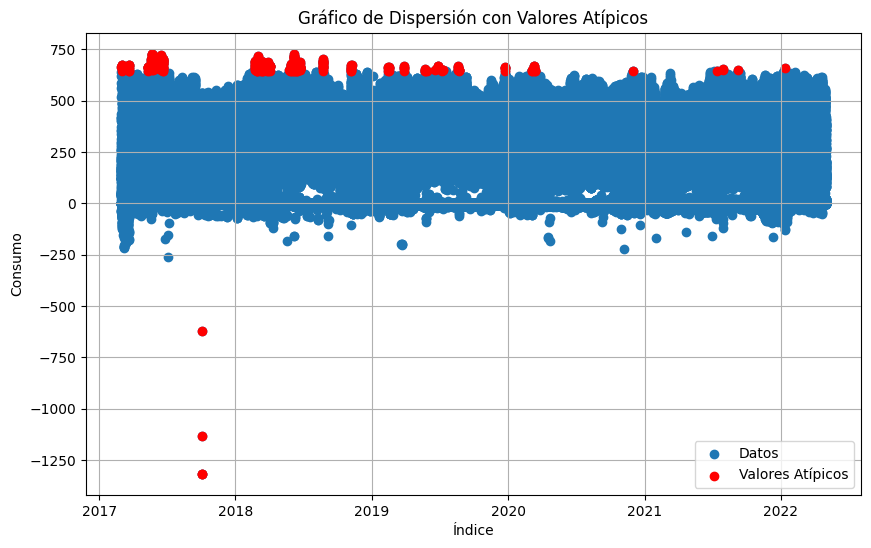

In [6]:
# Diagrama de caja
sns.boxplot(x=df['consumo'], color='skyblue')
plt.xlabel('Valores')
plt.title('Diagrama de caja para distribución de datos')
plt.show()

# Metodo z-score
df['z_score_consumo'] = np.abs((df['consumo'] - df['consumo'].mean()) / df['consumo'].std())

umbral_zscore = 3
valores_atipicos = df[df['z_score_consumo'] > umbral_zscore]

plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['consumo'], label='Datos')
plt.scatter(valores_atipicos.index, valores_atipicos['consumo'], color='r', label='Valores Atípicos')
plt.xlabel('Índice')
plt.ylabel('Consumo')
plt.title('Gráfico de Dispersión con Valores Atípicos')
plt.legend()
plt.grid(True)
plt.show()

df = df.drop('z_score_consumo', axis=1) # esta es solo util para calcular el z_score

## 2.3 Estadísticas descriptivas de los datos

       calidad_senal  muestras_hora  cantidad_interruptores        consumo
count  328769.000000  328769.000000           328769.000000  328769.000000
mean        1.017511       3.852480                5.354939     172.284079
std         1.420769       0.727405                1.935265     157.022371
min         0.000000       0.000000                1.000000   -1317.000000
25%         1.000000       4.000000                4.000000       0.000000
50%         1.000000       4.000000                5.000000     163.550479
75%         1.000000       4.000000                7.000000     256.077562
max        33.000000       4.000000                9.000000     728.155023


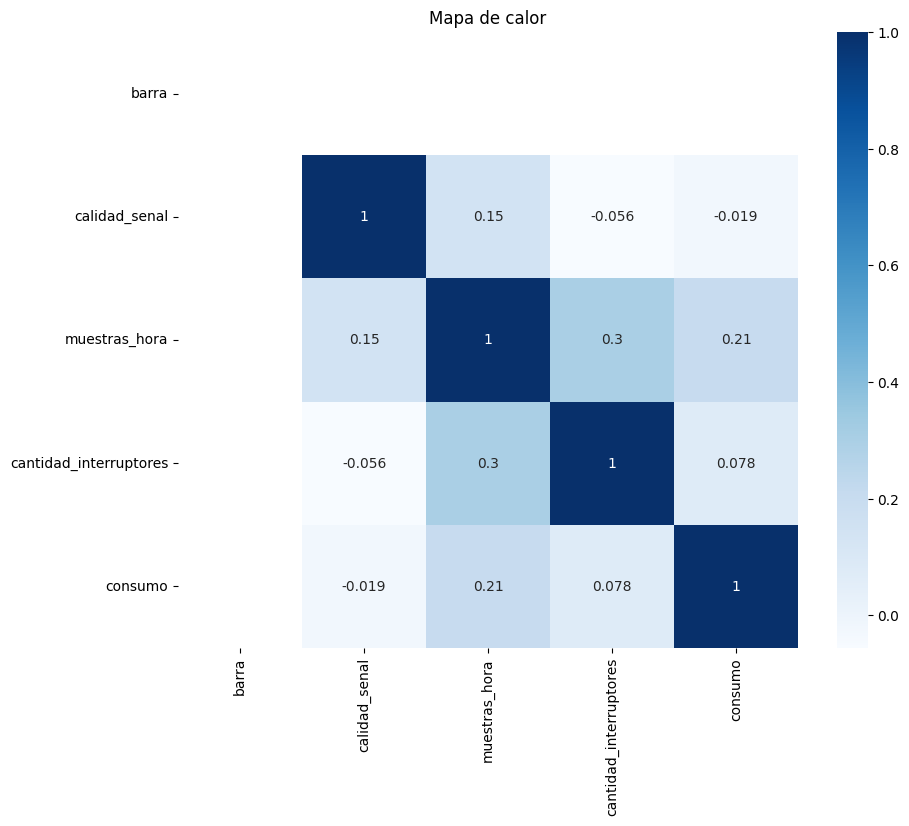

In [7]:
# Resumen de los datos
print(df.describe())

# Autocorrelación utilizando mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(df_numerico.corr(), cmap = 'Blues', annot = True)
plt.title('Mapa de calor')
plt.show()

# borrar estas columnas ya que no aportan información a los datos
df = df.drop('muestras_hora', axis=1)
df = df.drop('barra', axis=1)
df = df.drop('calidad_senal', axis=1)
df = df.drop('cantidad_interruptores', axis=1)

df_numerico = df.drop(columns=['subestacion']) # resetear df numérico

In [8]:
print(df.columns)
print(df.index.name)

print(df_numerico.columns)
print(df_numerico.index.name)

Index(['subestacion', 'consumo'], dtype='object')
fecha
Index(['consumo'], dtype='object')
fecha


## 2.4 Análisis de series de tiempo

### S: AJAHUEL

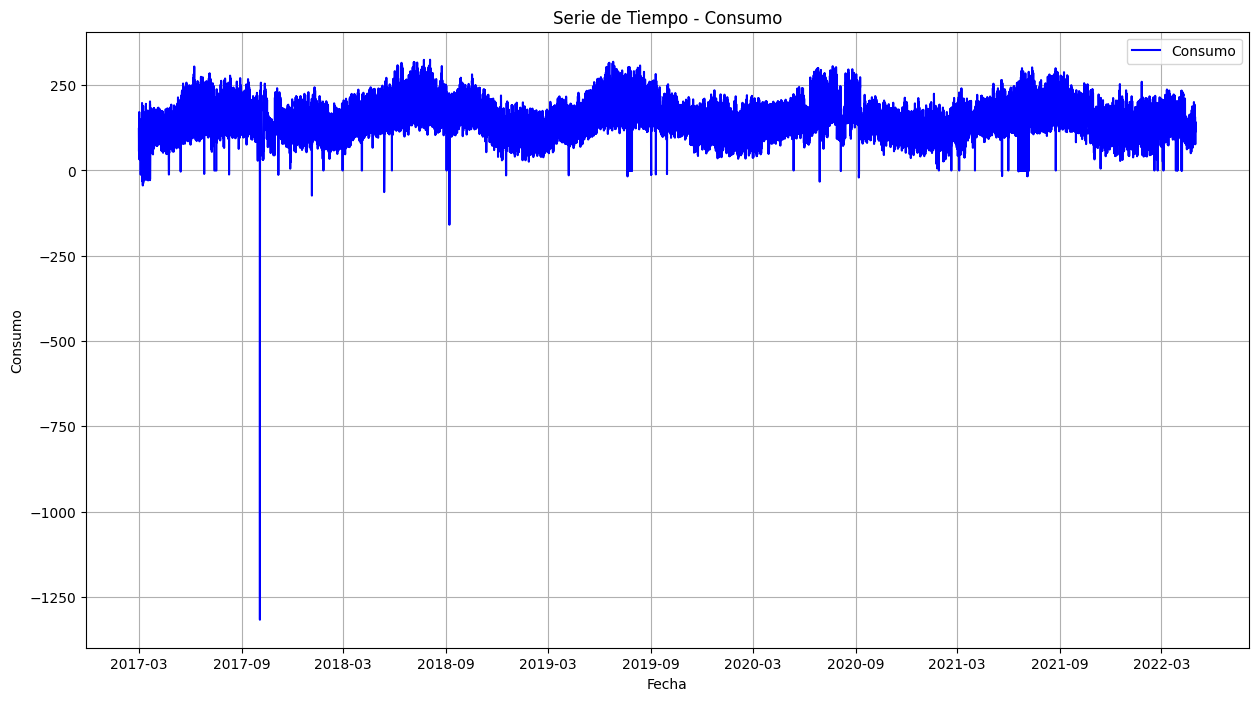

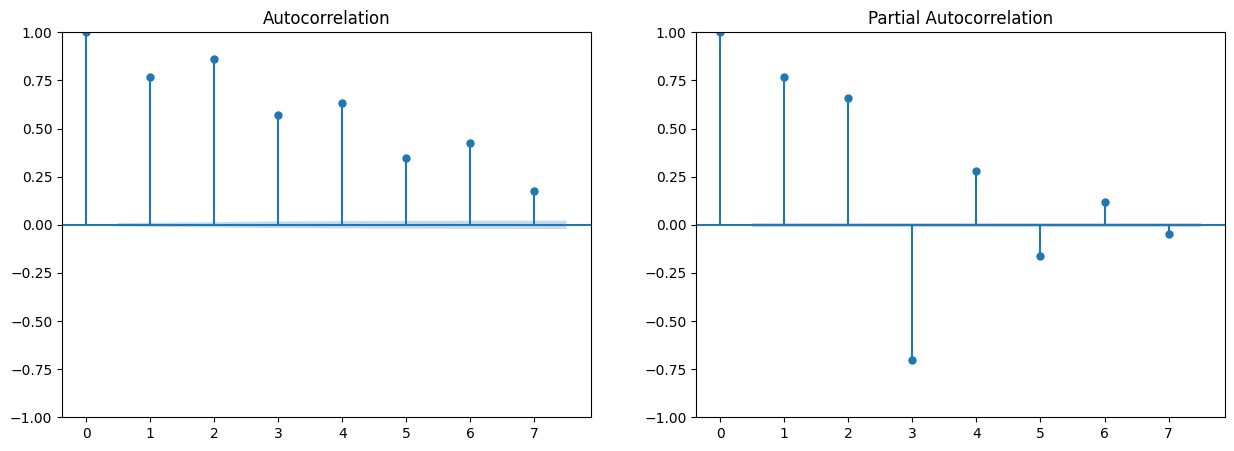

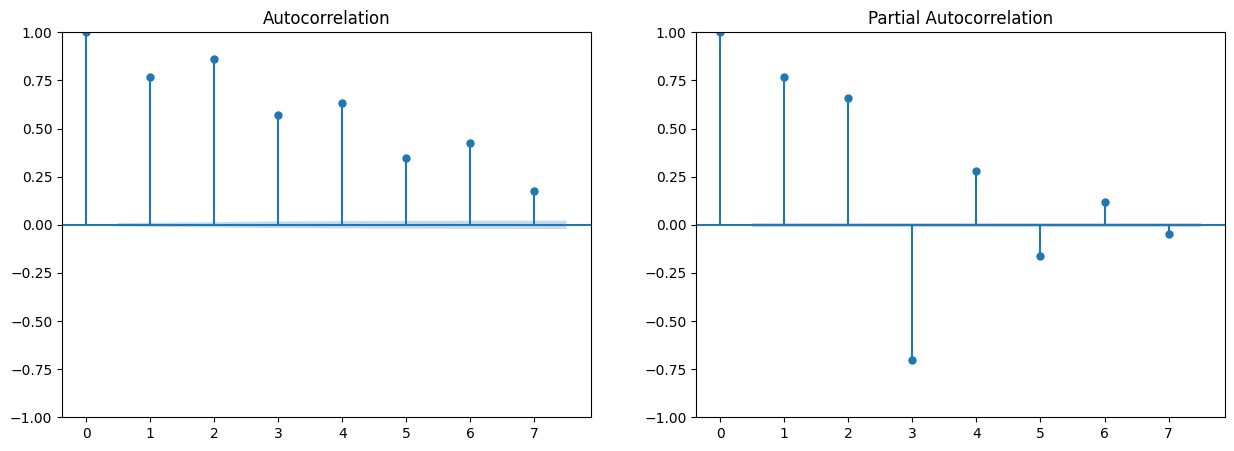

In [9]:
subestaciones=["AJAHUEL","BUIN","CHENA","CNAVIA","ELSALTO","FLORIDA","LOSALME"]

subestacion="AJAHUEL" #probamos visualizando los datos con la subestación AJAHUEL
filtro="subestacion=='{0}'".format(subestacion)
y=df.query(filtro)["consumo"]
x=df.query(filtro).index

# Graficar la serie de tiempo completa
plt.figure(figsize=(15, 8))
plt.plot(x, y, label='Consumo', color='blue')
plt.xlabel('Fecha')
plt.ylabel('Consumo')
plt.title('Serie de Tiempo - Consumo')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.grid(True)
plt.legend()
plt.show()

# Graficar la autocorrelación y autocorrelación parcial
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15, 5)

plot_acf(y, lags=7, alpha=0.05, ax=axes[0])
plot_pacf(y, method="ywm", lags=7, alpha=0.05 , ax=axes[1])

<Axes: xlabel='hora', ylabel='consumo'>

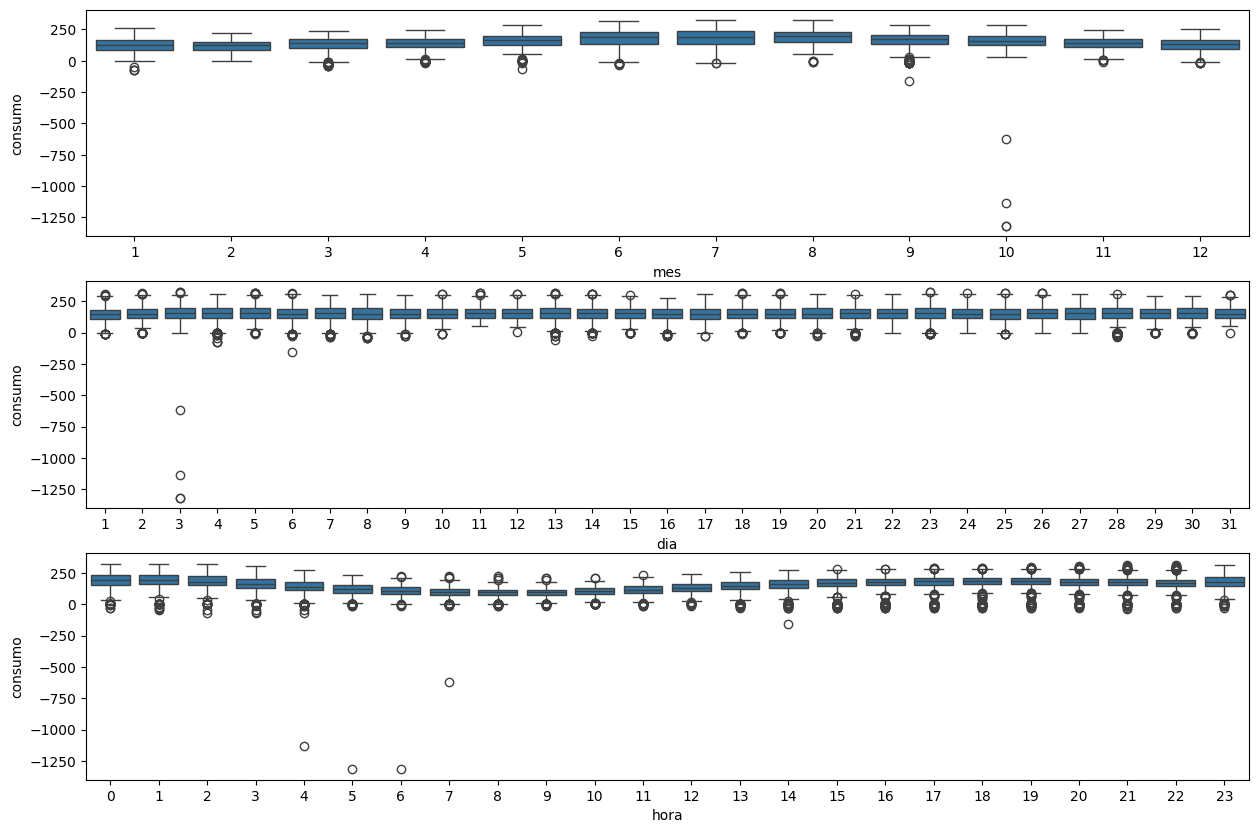

In [10]:
data=pd.DataFrame()
data["consumo"]=y
data["fecha"]=pd.to_datetime(y.index, utc="True")
data['dia']=data['fecha'].dt.day
data['hora']=data['fecha'].dt.hour
data['mes']=data['fecha'].dt.month

fig, axes = plt.subplots(3,1)
fig.set_size_inches(15, 10)

sns.boxplot(x="mes", y="consumo",data=data,ax=axes[0])
sns.boxplot(x="dia", y="consumo",data=data,ax=axes[1])
sns.boxplot(x="hora", y="consumo",data=data,ax=axes[2])

In [11]:
result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -12.940704
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


### S: BUIN

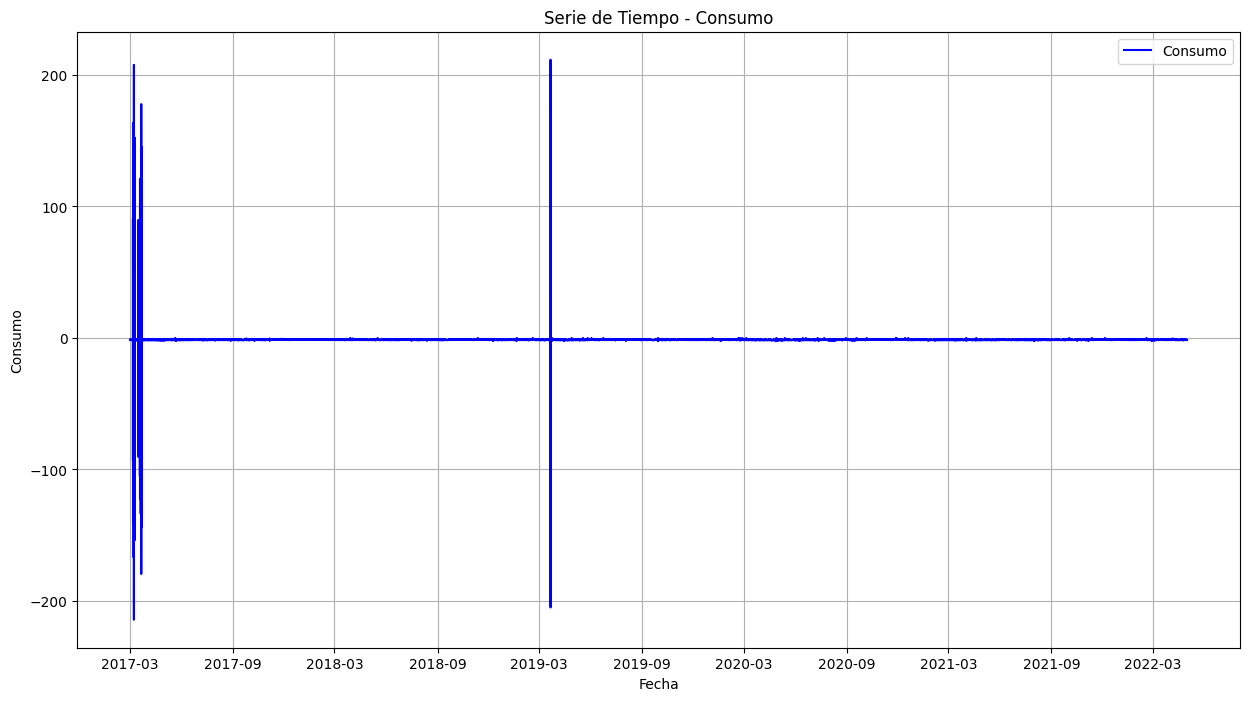

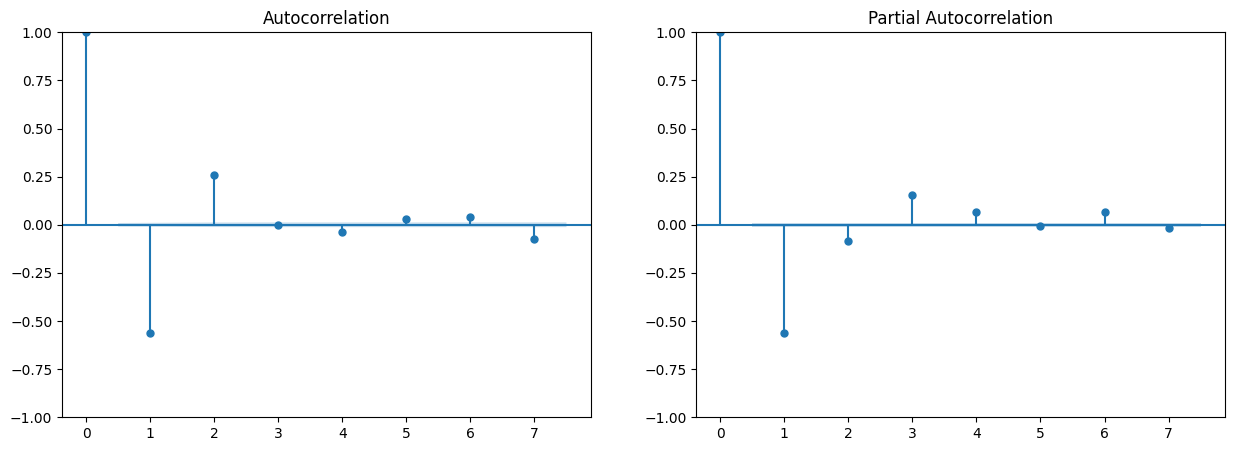

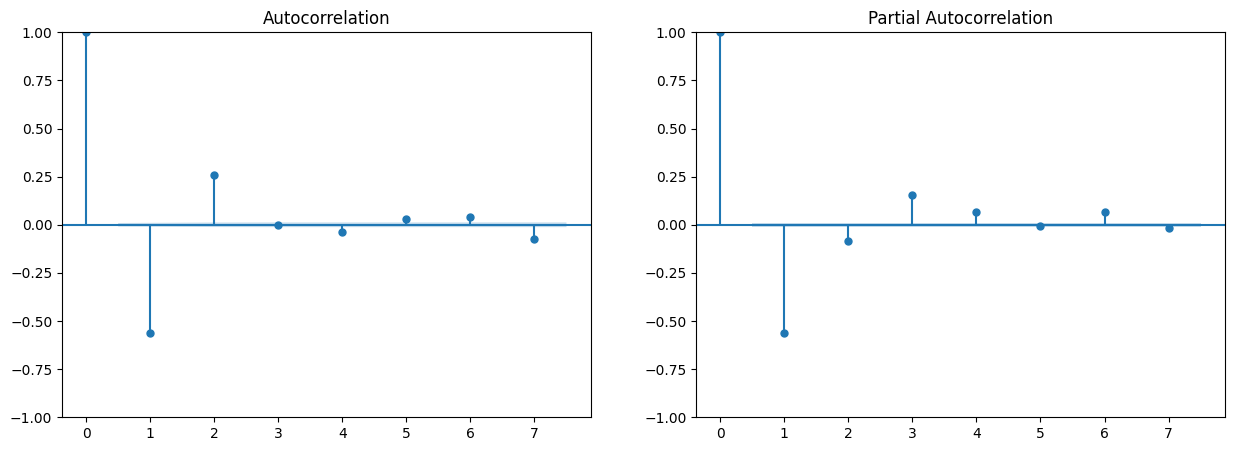

In [12]:
subestacion="BUIN" #probamos visualizando los datos con la subestación CNAVIA
filtro="subestacion=='{0}'".format(subestacion)
y=df.query(filtro)["consumo"]
x=df.query(filtro).index

# Graficar la serie de tiempo completa
plt.figure(figsize=(15, 8))
plt.plot(x, y, label='Consumo', color='blue')
plt.xlabel('Fecha')
plt.ylabel('Consumo')
plt.title('Serie de Tiempo - Consumo')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.grid(True)
plt.legend()
plt.show()

# Graficar la autocorrelación y autocorrelación parcial
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15, 5)

plot_acf(y, lags=7, alpha=0.05, ax=axes[0])
plot_pacf(y, method="ywm", lags=7, alpha=0.05 , ax=axes[1])

<Axes: xlabel='hora', ylabel='consumo'>

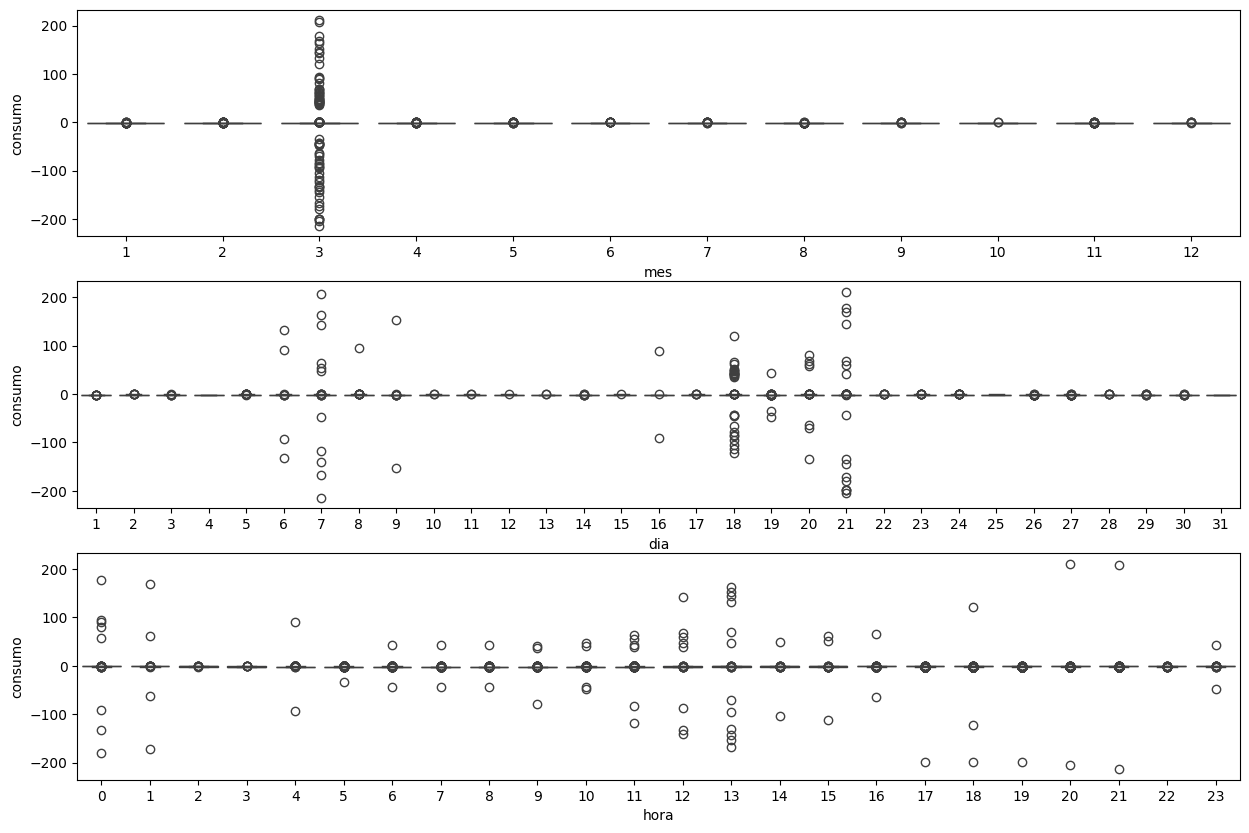

In [13]:
data=pd.DataFrame()
data["consumo"]=y
data["fecha"]=pd.to_datetime(y.index, utc="True")
data['dia']=data['fecha'].dt.day
data['hora']=data['fecha'].dt.hour
data['mes']=data['fecha'].dt.month

fig, axes = plt.subplots(3,1)
fig.set_size_inches(15, 10)

sns.boxplot(x="mes", y="consumo",data=data,ax=axes[0])
sns.boxplot(x="dia", y="consumo",data=data,ax=axes[1])
sns.boxplot(x="hora", y="consumo",data=data,ax=axes[2])

In [14]:
result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -27.756376
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


### S: CHENA

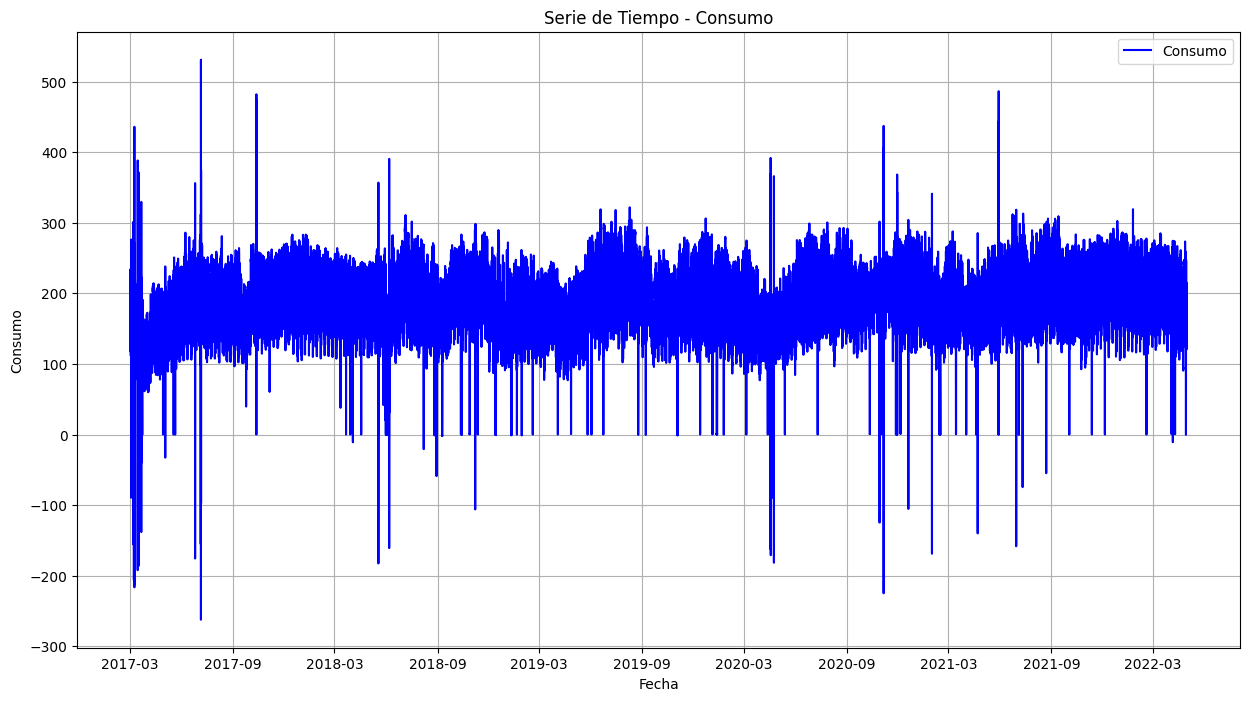

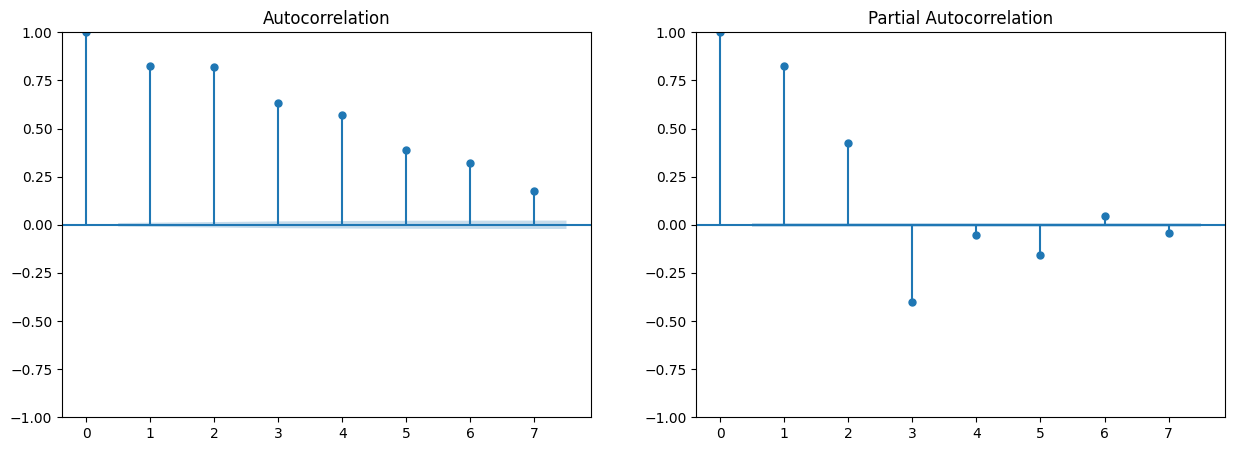

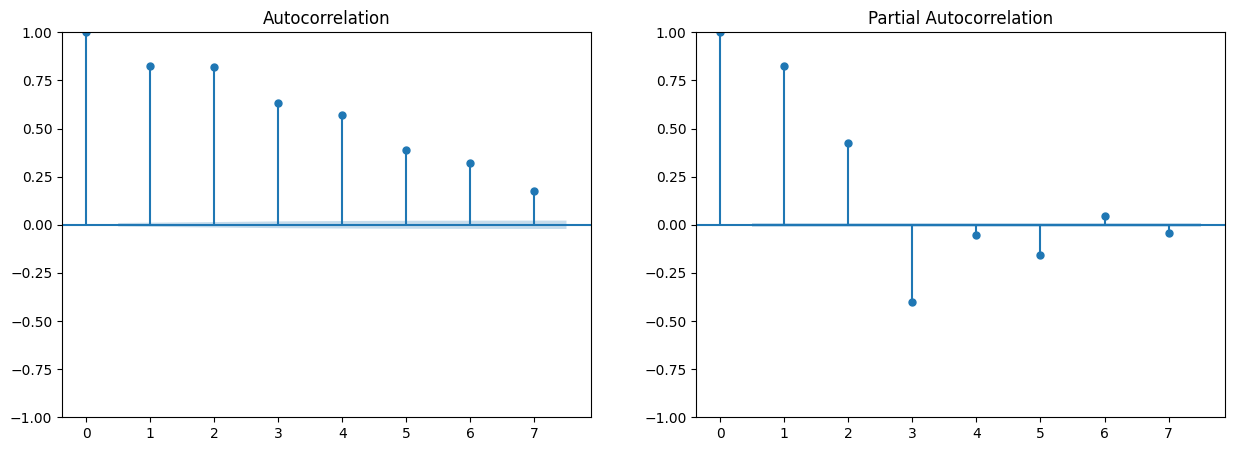

In [15]:
subestacion="CHENA" #probamos visualizando los datos con la subestación CNAVIA
filtro="subestacion=='{0}'".format(subestacion)
y=df.query(filtro)["consumo"]
x=df.query(filtro).index

# Graficar la serie de tiempo completa
plt.figure(figsize=(15, 8))
plt.plot(x, y, label='Consumo', color='blue')
plt.xlabel('Fecha')
plt.ylabel('Consumo')
plt.title('Serie de Tiempo - Consumo')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.grid(True)
plt.legend()
plt.show()

# Graficar la autocorrelación y autocorrelación parcial
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15, 5)

plot_acf(y, lags=7, alpha=0.05, ax=axes[0])
plot_pacf(y, method="ywm", lags=7, alpha=0.05 , ax=axes[1])

<Axes: xlabel='hora', ylabel='consumo'>

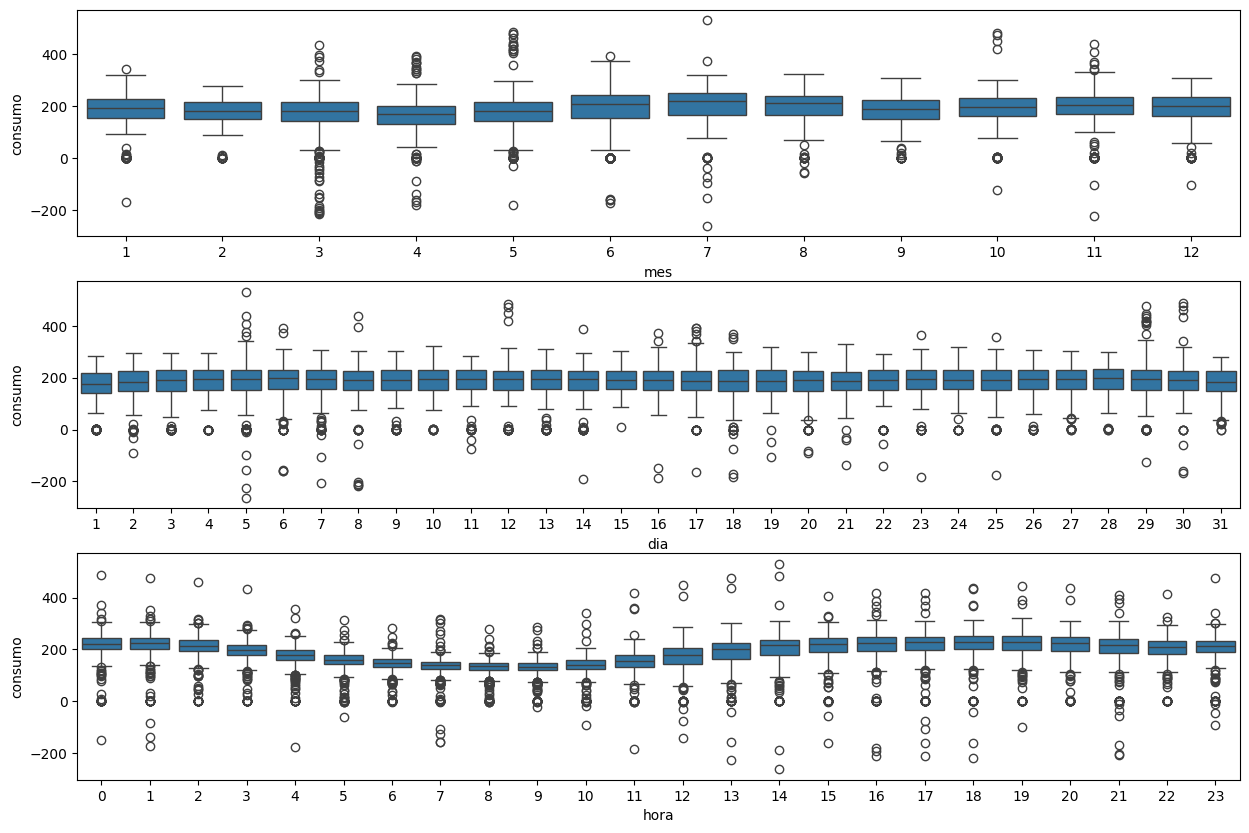

In [16]:
data=pd.DataFrame()
data["consumo"]=y
data["fecha"]=pd.to_datetime(y.index, utc="True")
data['dia']=data['fecha'].dt.day
data['hora']=data['fecha'].dt.hour
data['mes']=data['fecha'].dt.month

fig, axes = plt.subplots(3,1)
fig.set_size_inches(15, 10)

sns.boxplot(x="mes", y="consumo",data=data,ax=axes[0])
sns.boxplot(x="dia", y="consumo",data=data,ax=axes[1])
sns.boxplot(x="hora", y="consumo",data=data,ax=axes[2])

In [17]:
result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -19.028391
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


### S: CNAVIA

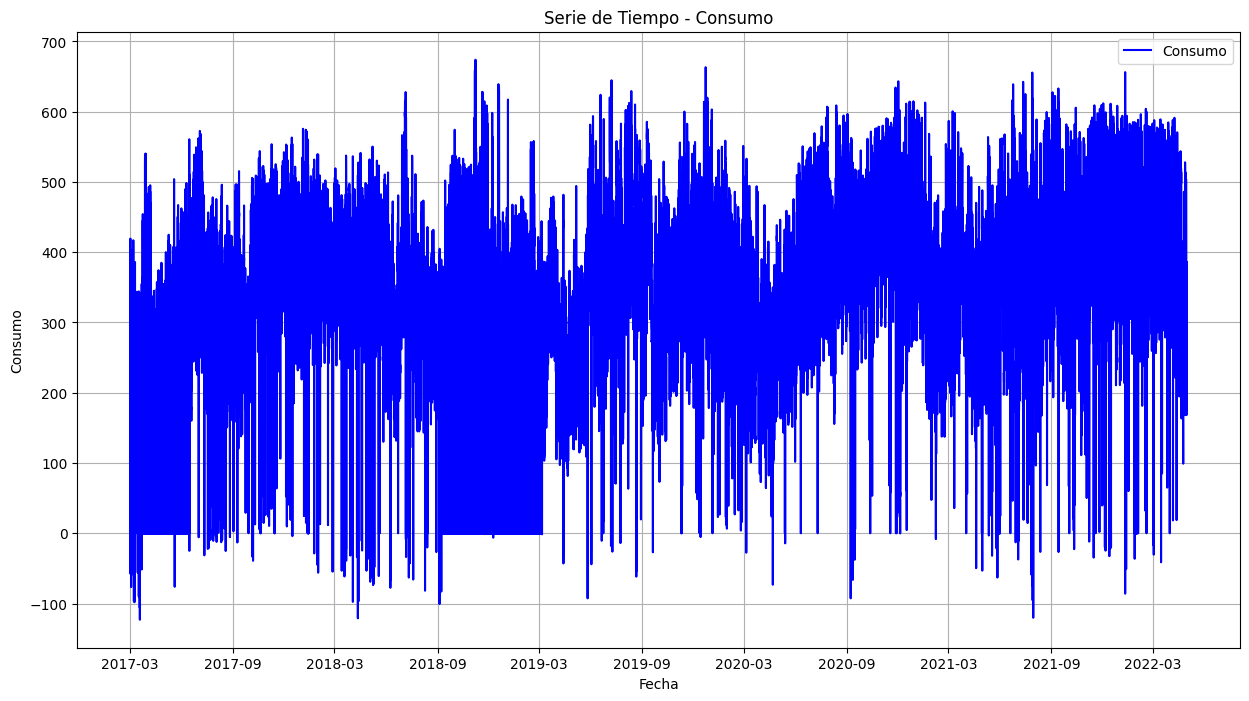

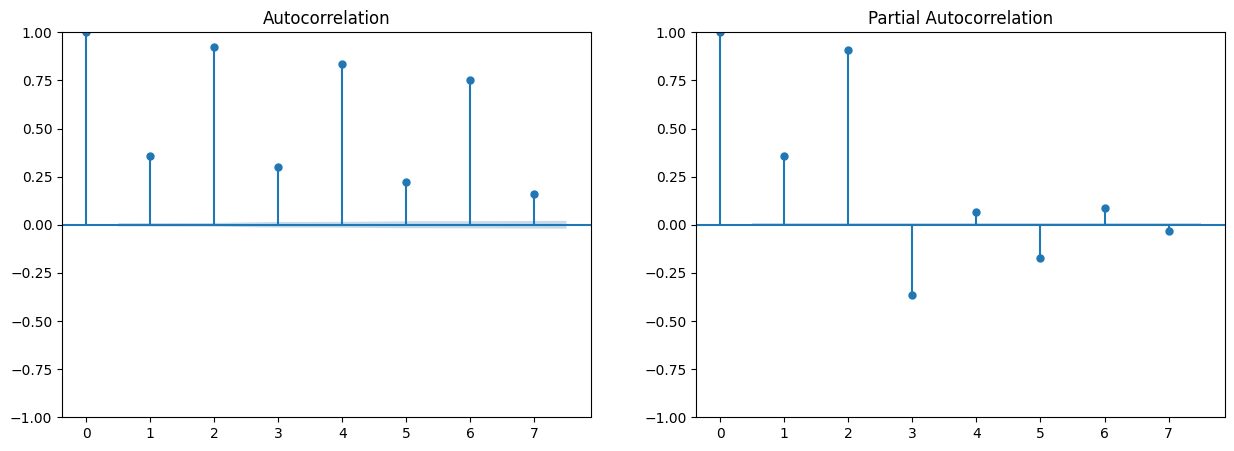

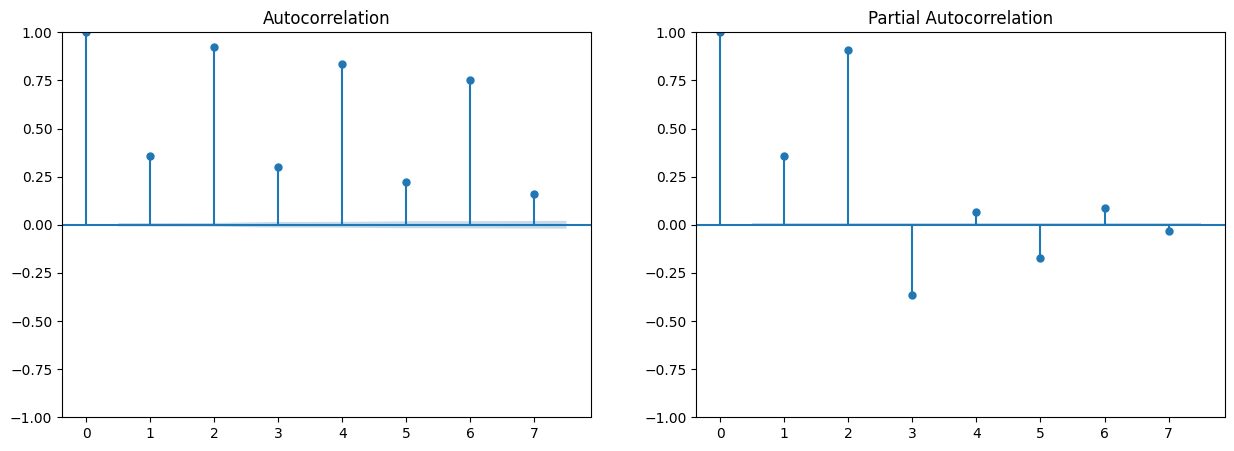

In [18]:
subestacion="CNAVIA" #probamos visualizando los datos con la subestación CNAVIA
filtro="subestacion=='{0}'".format(subestacion)
y=df.query(filtro)["consumo"]
x=df.query(filtro).index

# Graficar la serie de tiempo completa
plt.figure(figsize=(15, 8))
plt.plot(x, y, label='Consumo', color='blue')
plt.xlabel('Fecha')
plt.ylabel('Consumo')
plt.title('Serie de Tiempo - Consumo')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.grid(True)
plt.legend()
plt.show()

# Graficar la autocorrelación y autocorrelación parcial
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15, 5)

plot_acf(y, lags=7, alpha=0.05, ax=axes[0])
plot_pacf(y, method="ywm", lags=7, alpha=0.05 , ax=axes[1])

<Axes: xlabel='hora', ylabel='consumo'>

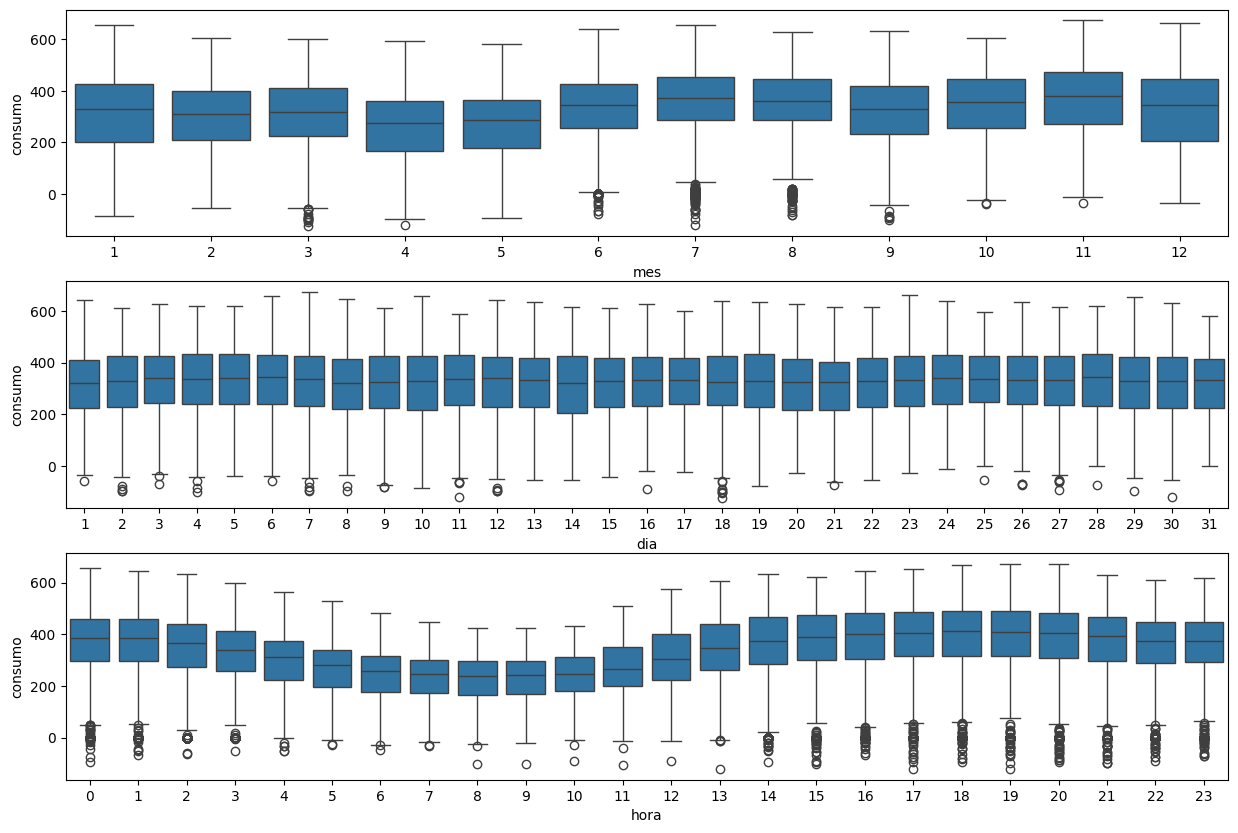

In [19]:
data=pd.DataFrame()
data["consumo"]=y
data["fecha"]=pd.to_datetime(y.index, utc="True")
data['dia']=data['fecha'].dt.day
data['hora']=data['fecha'].dt.hour
data['mes']=data['fecha'].dt.month

fig, axes = plt.subplots(3,1)
fig.set_size_inches(15, 10)

sns.boxplot(x="mes", y="consumo",data=data,ax=axes[0])
sns.boxplot(x="dia", y="consumo",data=data,ax=axes[1])
sns.boxplot(x="hora", y="consumo",data=data,ax=axes[2])

In [20]:
result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -9.322051
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


### S: ELSALTO

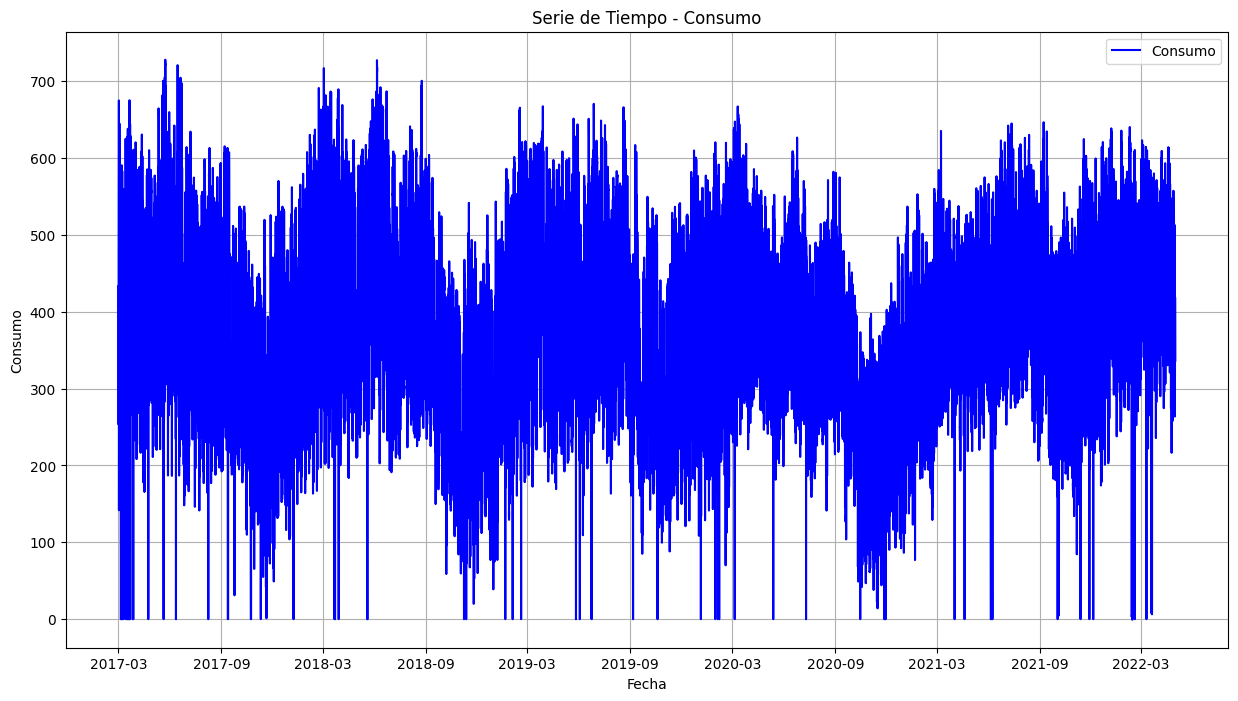

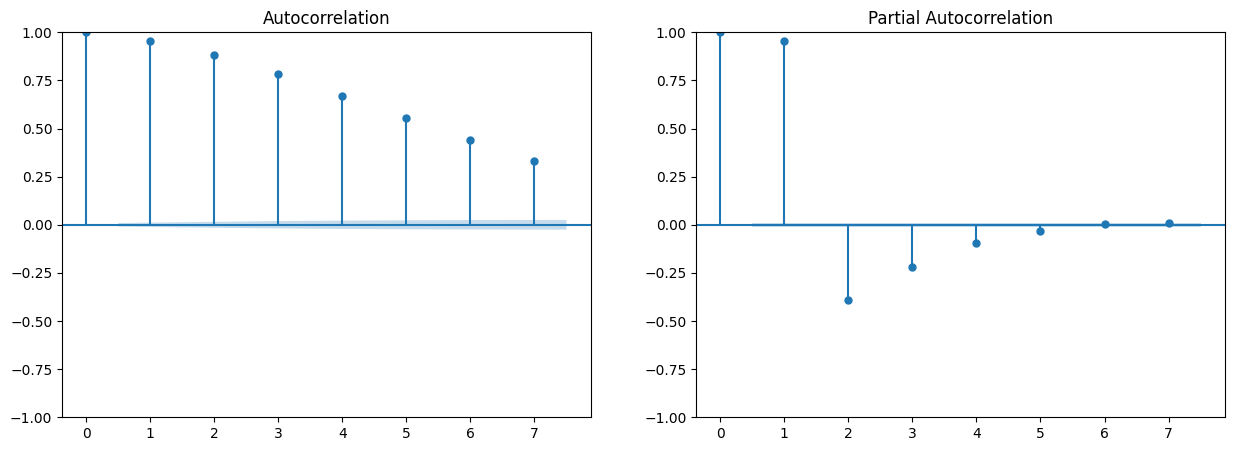

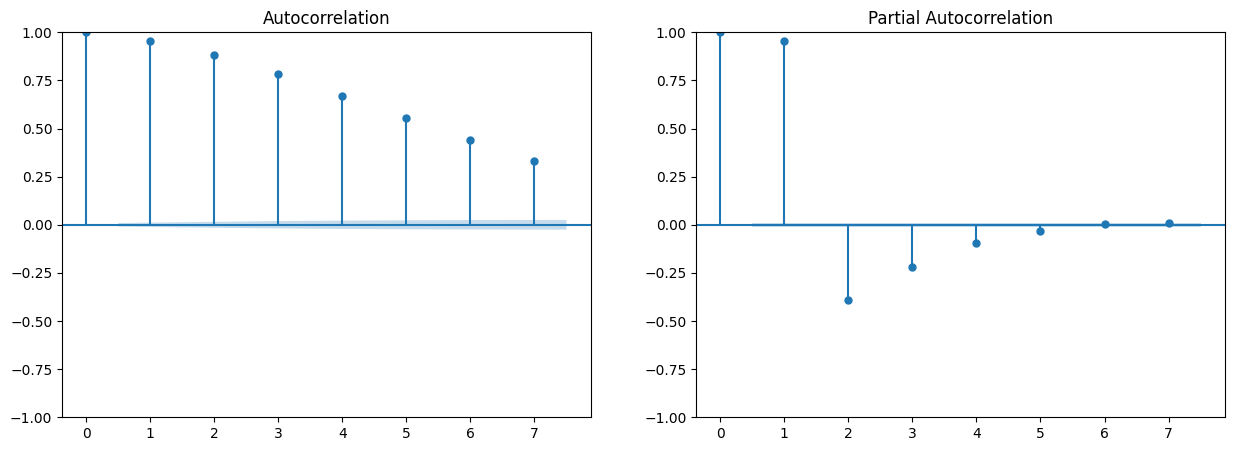

In [21]:
subestacion="ELSALTO" #probamos visualizando los datos con la subestación CNAVIA
filtro="subestacion=='{0}'".format(subestacion)
y=df.query(filtro)["consumo"]
x=df.query(filtro).index

# Graficar la serie de tiempo completa
plt.figure(figsize=(15, 8))
plt.plot(x, y, label='Consumo', color='blue')
plt.xlabel('Fecha')
plt.ylabel('Consumo')
plt.title('Serie de Tiempo - Consumo')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.grid(True)
plt.legend()
plt.show()

# Graficar la autocorrelación y autocorrelación parcial
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15, 5)

plot_acf(y, lags=7, alpha=0.05, ax=axes[0])
plot_pacf(y, method="ywm", lags=7, alpha=0.05 , ax=axes[1])

<Axes: xlabel='hora', ylabel='consumo'>

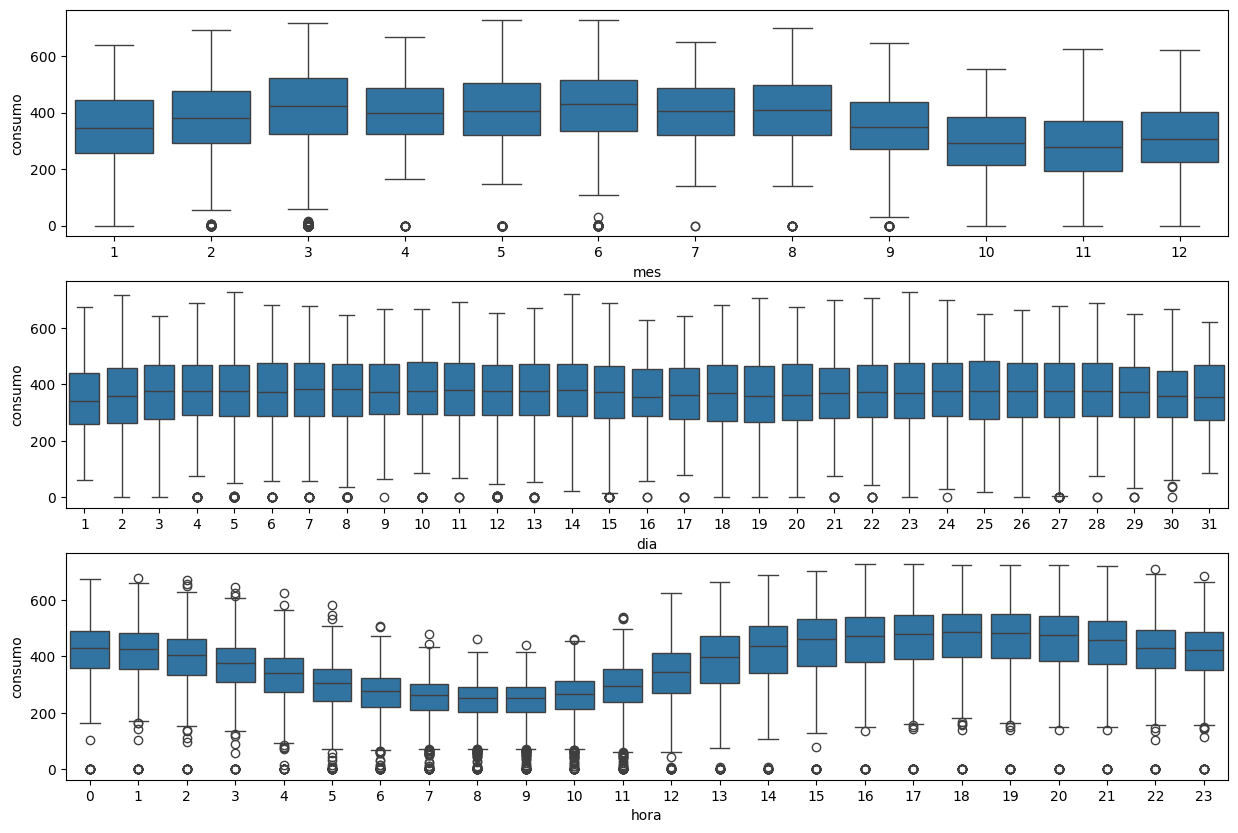

In [22]:
data=pd.DataFrame()
data["consumo"]=y
data["fecha"]=pd.to_datetime(y.index, utc="True")
data['dia']=data['fecha'].dt.day
data['hora']=data['fecha'].dt.hour
data['mes']=data['fecha'].dt.month

fig, axes = plt.subplots(3,1)
fig.set_size_inches(15, 10)

sns.boxplot(x="mes", y="consumo",data=data,ax=axes[0])
sns.boxplot(x="dia", y="consumo",data=data,ax=axes[1])
sns.boxplot(x="hora", y="consumo",data=data,ax=axes[2])

In [23]:
result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -16.868375
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


### S: FLORIDA

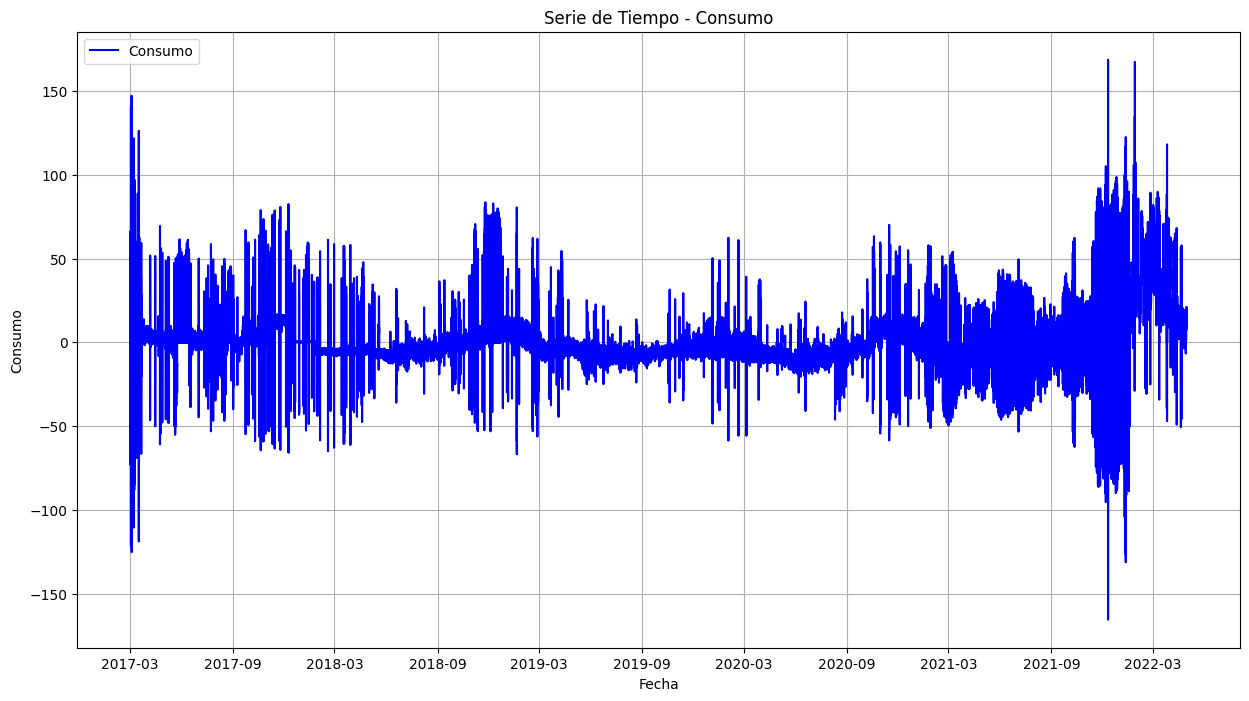

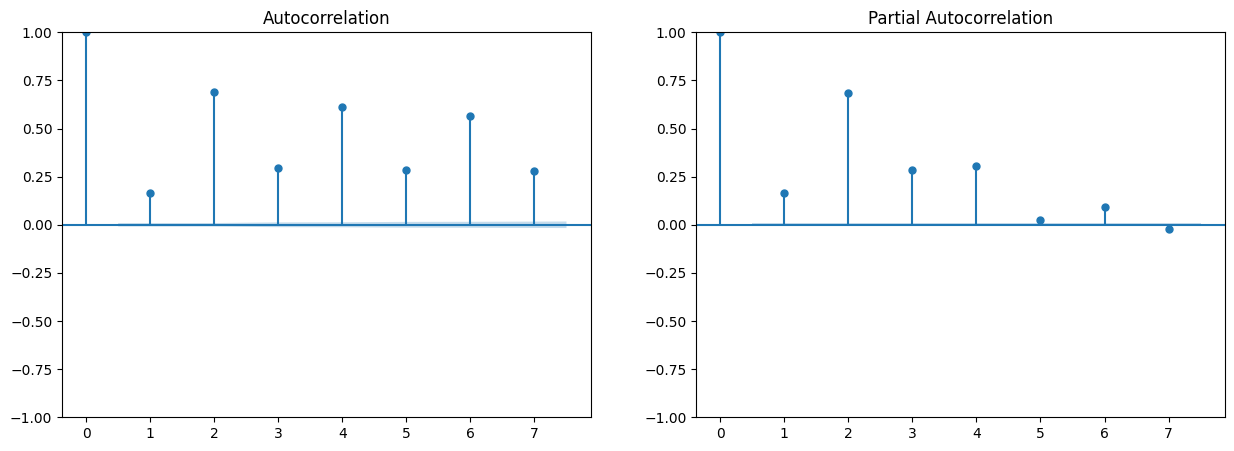

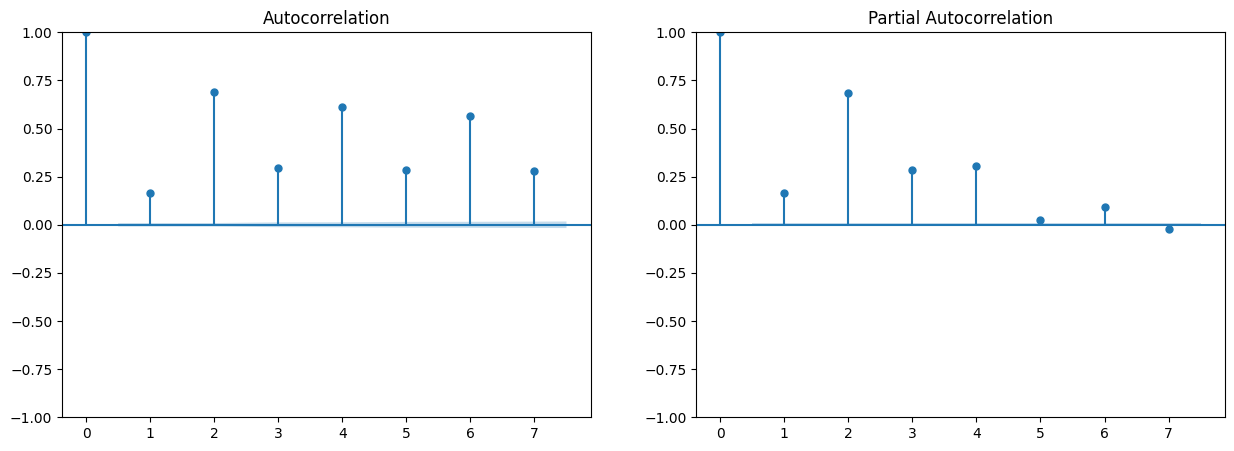

In [9]:
subestacion="FLORIDA" #probamos visualizando los datos con la subestación CNAVIA
filtro="subestacion=='{0}'".format(subestacion)
y=df.query(filtro)["consumo"]
x=df.query(filtro).index

# Graficar la serie de tiempo completa
plt.figure(figsize=(15, 8))
plt.plot(x, y, label='Consumo', color='blue')
plt.xlabel('Fecha')
plt.ylabel('Consumo')
plt.title('Serie de Tiempo - Consumo')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.grid(True)
plt.legend()
plt.show()

# Graficar la autocorrelación y autocorrelación parcial
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15, 5)

plot_acf(y, lags=7, alpha=0.05, ax=axes[0])
plot_pacf(y, method="ywm", lags=7, alpha=0.05 , ax=axes[1])

<Axes: xlabel='hora', ylabel='consumo'>

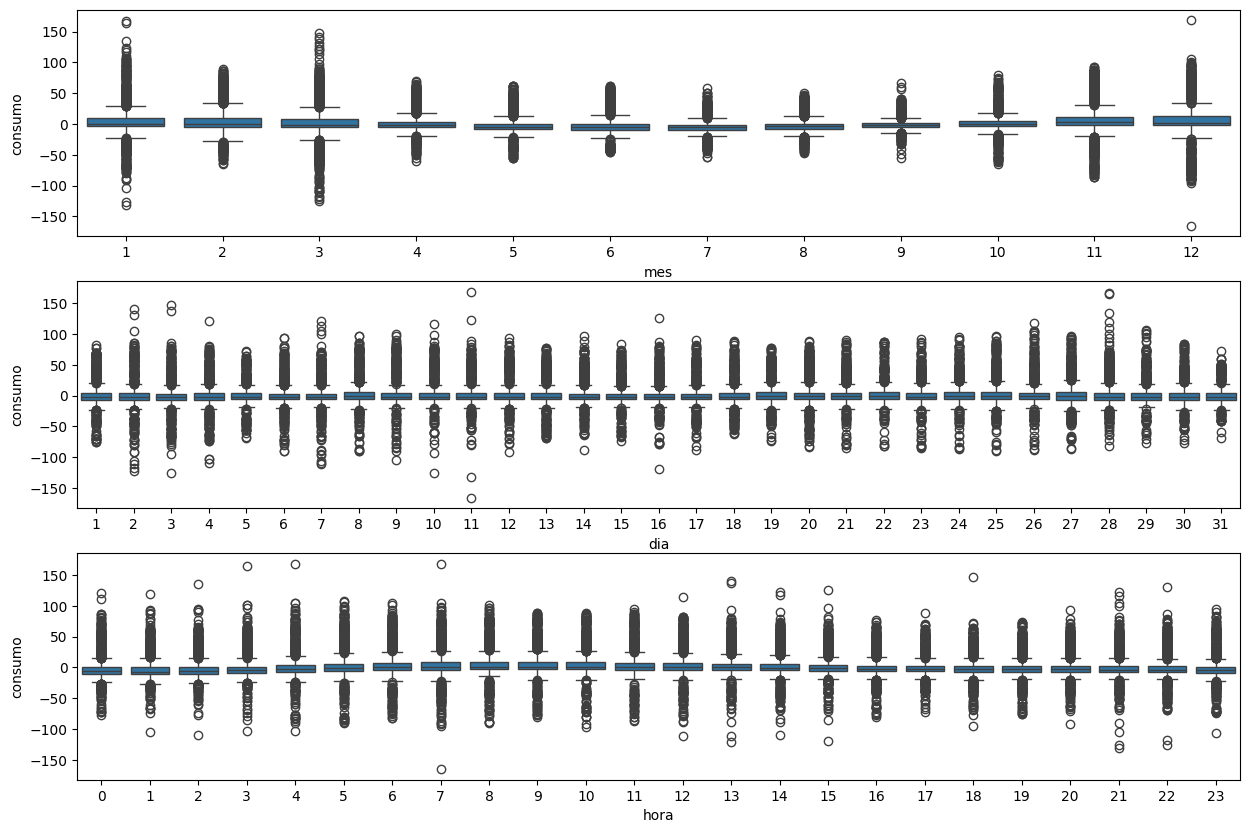

In [77]:
data=pd.DataFrame()
data["consumo"]=y
data["fecha"]=pd.to_datetime(y.index, utc="True")
data['dia']=data['fecha'].dt.day
data['hora']=data['fecha'].dt.hour
data['mes']=data['fecha'].dt.month

fig, axes = plt.subplots(3,1)
fig.set_size_inches(15, 10)

sns.boxplot(x="mes", y="consumo",data=data,ax=axes[0])
sns.boxplot(x="dia", y="consumo",data=data,ax=axes[1])
sns.boxplot(x="hora", y="consumo",data=data,ax=axes[2])

In [10]:
result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.998049
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


### S: LOSALME

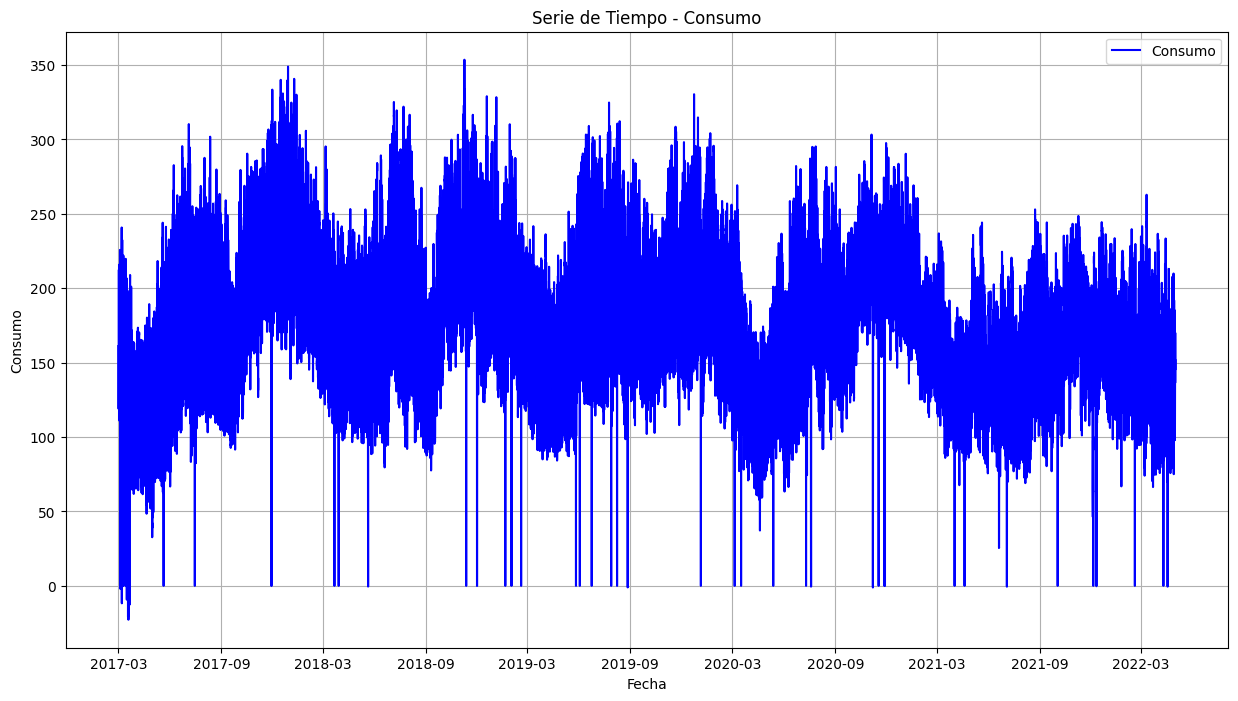

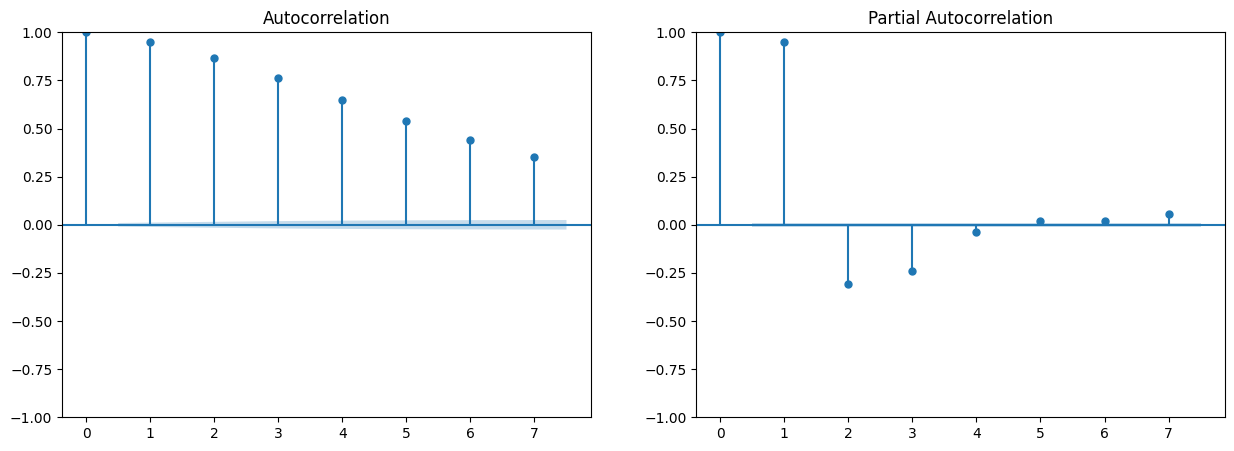

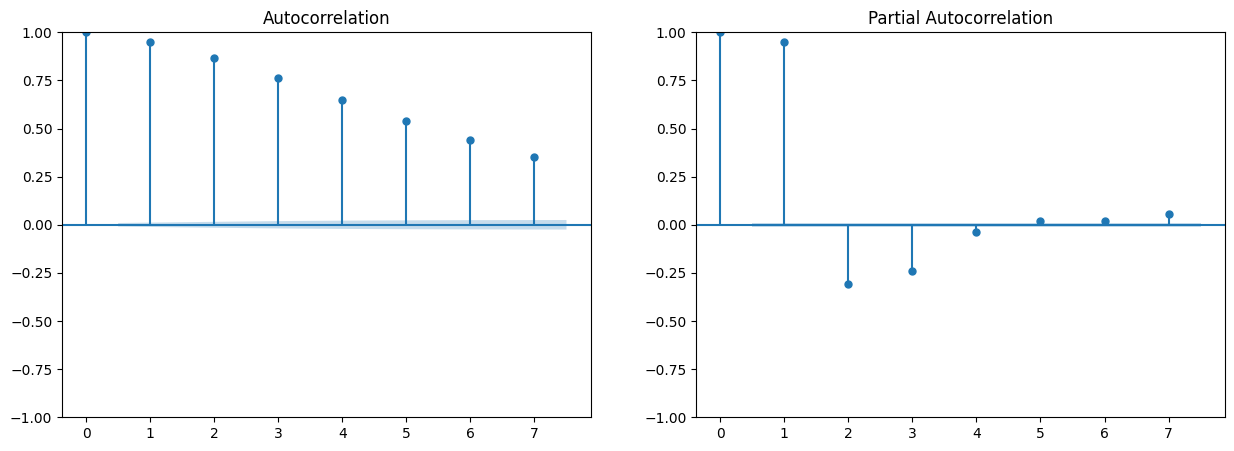

In [27]:
subestacion="LOSALME" #probamos visualizando los datos con la subestación CNAVIA
filtro="subestacion=='{0}'".format(subestacion)
y=df.query(filtro)["consumo"]
x=df.query(filtro).index

# Graficar la serie de tiempo completa
plt.figure(figsize=(15, 8))
plt.plot(x, y, label='Consumo', color='blue')
plt.xlabel('Fecha')
plt.ylabel('Consumo')
plt.title('Serie de Tiempo - Consumo')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.grid(True)
plt.legend()
plt.show()

# Graficar la autocorrelación y autocorrelación parcial
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15, 5)

plot_acf(y, lags=7, alpha=0.05, ax=axes[0])
plot_pacf(y, method="ywm", lags=7, alpha=0.05 , ax=axes[1])

<Axes: xlabel='hora', ylabel='consumo'>

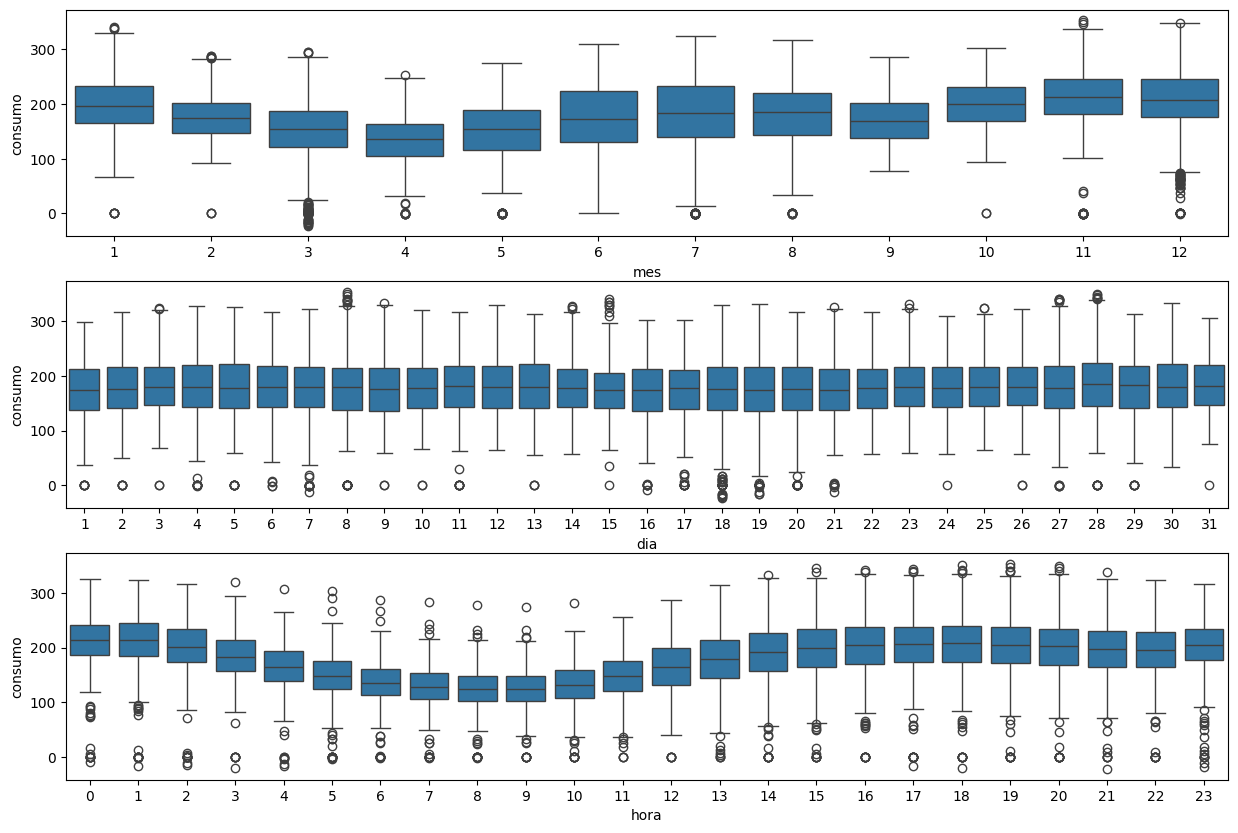

In [28]:
data=pd.DataFrame()
data["consumo"]=y
data["fecha"]=pd.to_datetime(y.index, utc="True")
data['dia']=data['fecha'].dt.day
data['hora']=data['fecha'].dt.hour
data['mes']=data['fecha'].dt.month

fig, axes = plt.subplots(3,1)
fig.set_size_inches(15, 10)

sns.boxplot(x="mes", y="consumo",data=data,ax=axes[0])
sns.boxplot(x="dia", y="consumo",data=data,ax=axes[1])
sns.boxplot(x="hora", y="consumo",data=data,ax=axes[2])

In [29]:
result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -11.337786
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


In [11]:
# Exportar df para utilizar en modelos de aprendizaje
df.to_csv('CNANCUAN_201703-202204.csv')